In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.gridspec as gridspec
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
from sklearn import mixture

In [3]:
df = pd.read_csv("C:/Users/galax/Downloads/insurance.csv")

print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


C:\Users\galax\AppData\Local\Temp\ipykernel_19404\579679181.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], bins=30)
C:\Users\galax\AppData\Local\Temp\ipykernel_19404\579679181.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], bins=30)


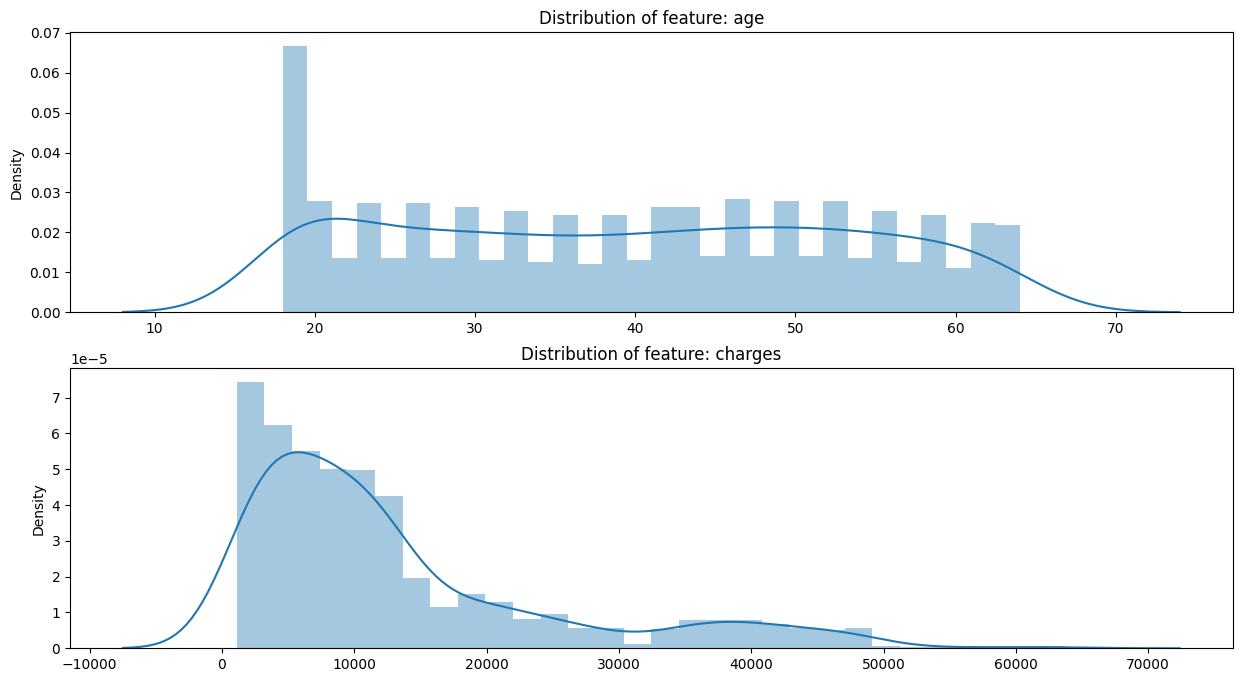

In [4]:

features=['age', 'charges']
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feat], bins=30)
    
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

In [5]:
newdf = df[['age','charges']]
newdf.head()

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520


After Scaling

In [6]:
ct = ColumnTransformer(
[("scaling", StandardScaler(), ['age', 'charges']),
 ])

ct.fit(newdf)
newdf1 = ct.transform(newdf)
newdf2= pd.DataFrame(newdf1)
newdf2.columns=['age','charges']
df_ = newdf2
df_.head()

,age,charges
0,-1.438764,0.298584
1,-1.509965,-0.953689
2,-0.797954,-0.728675
3,-0.441948,0.719843
4,-0.513149,-0.776802


C:\Users\galax\AppData\Local\Temp\ipykernel_19404\1680862942.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_[feat], bins=30)
C:\Users\galax\AppData\Local\Temp\ipykernel_19404\1680862942.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_[feat], bins=30)


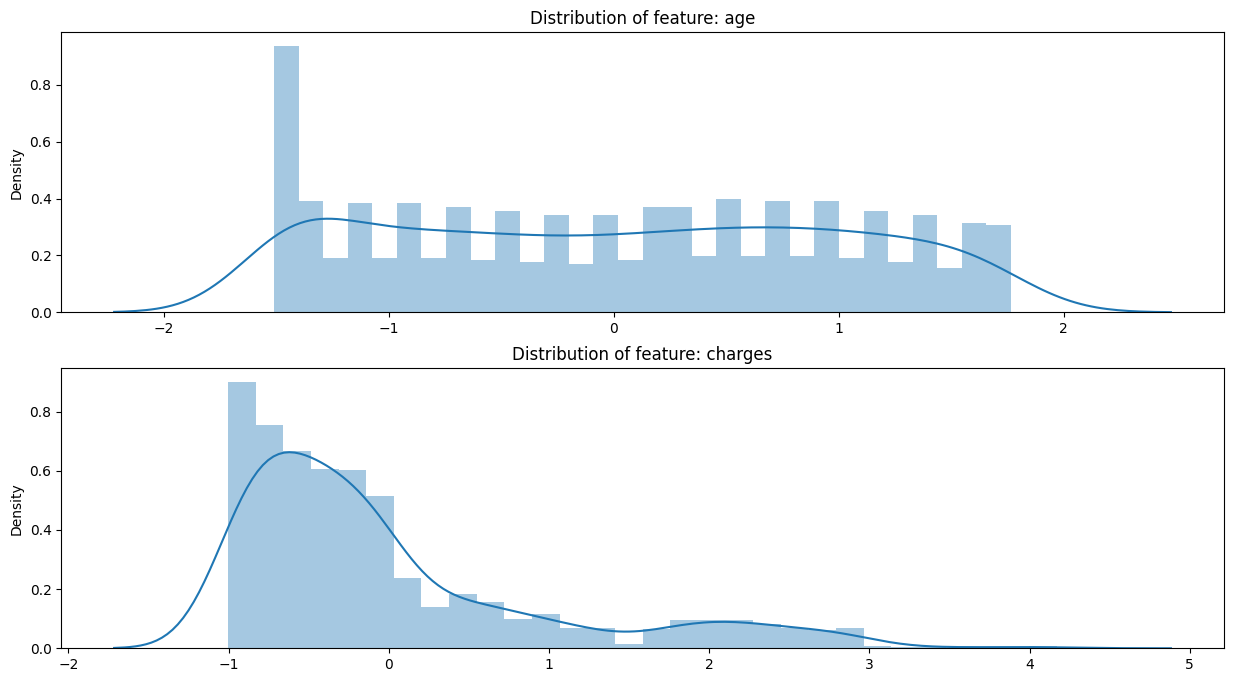

In [7]:
features=['age', 'charges']
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df_[feat], bins=30)
    
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

<Axes: xlabel='age', ylabel='charges'>

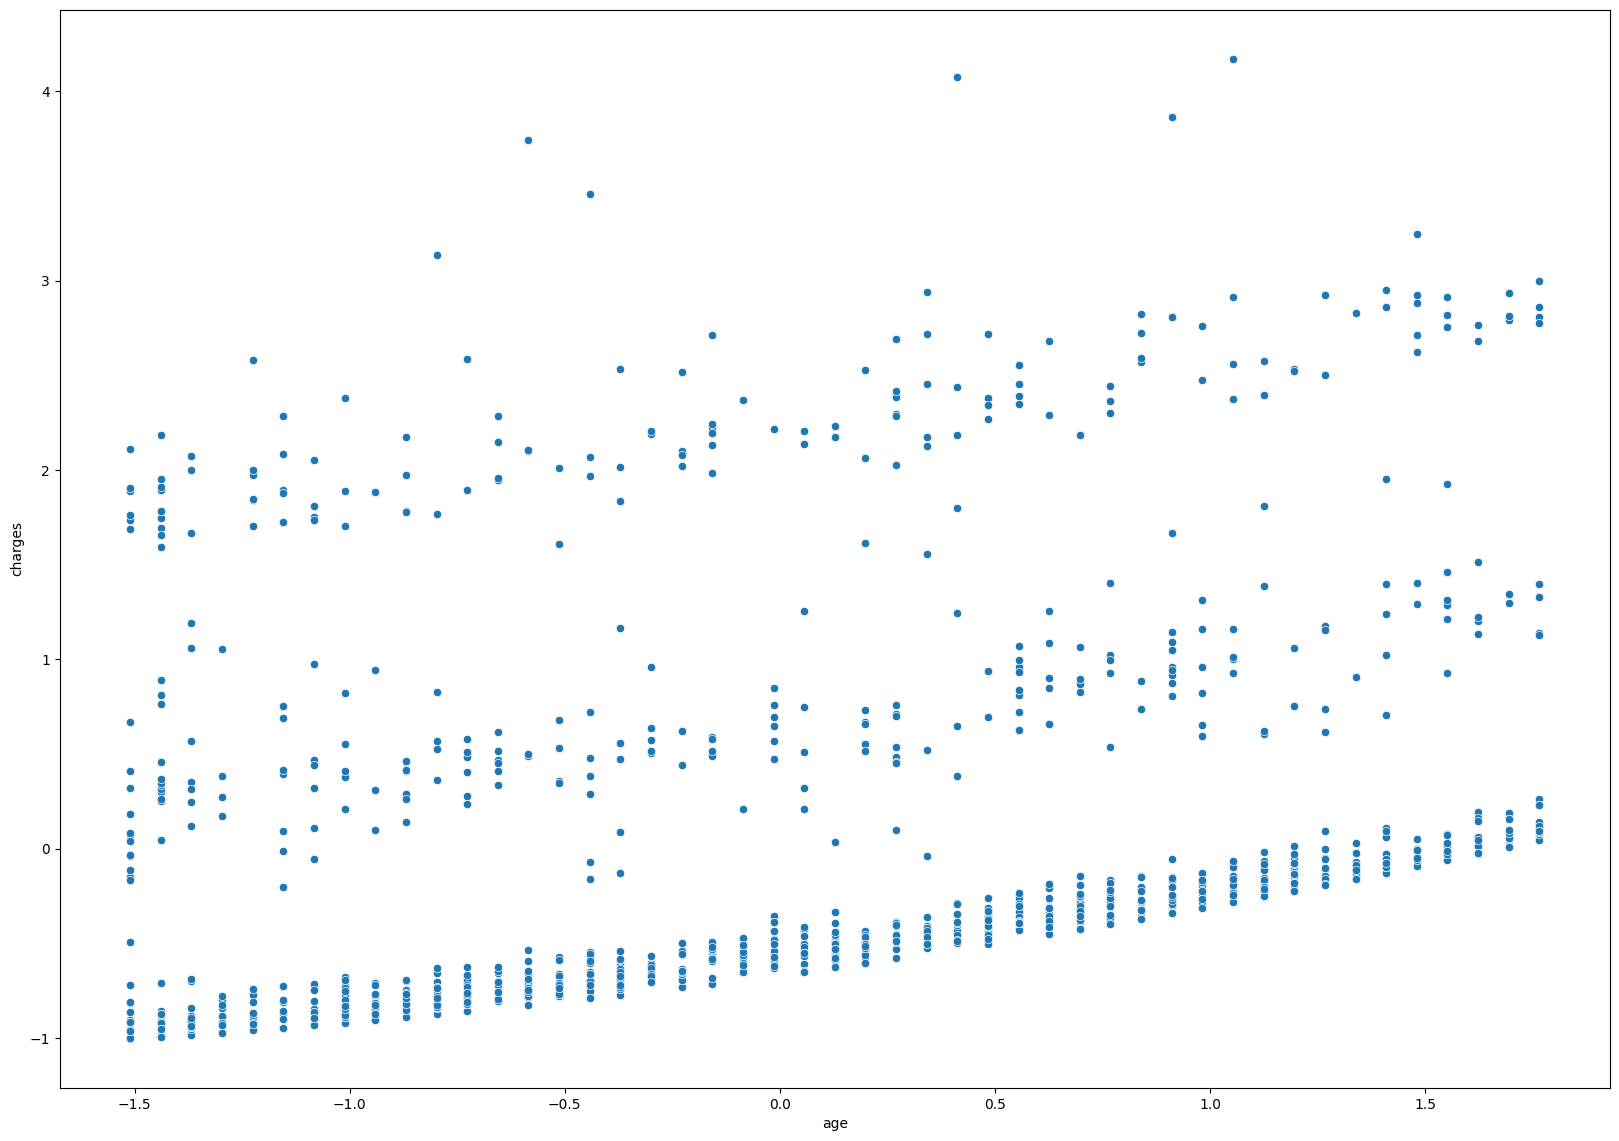

In [8]:
plt.figure(figsize=(20,14))
sns.scatterplot(x = df_['age'],y = df_['charges'])

In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(df_)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x000002150B78A660>)

In [10]:
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
4,5,full,819.310448
3,4,full,828.737244
1,2,full,836.280374
5,6,full,842.404287
2,3,full,1028.397315


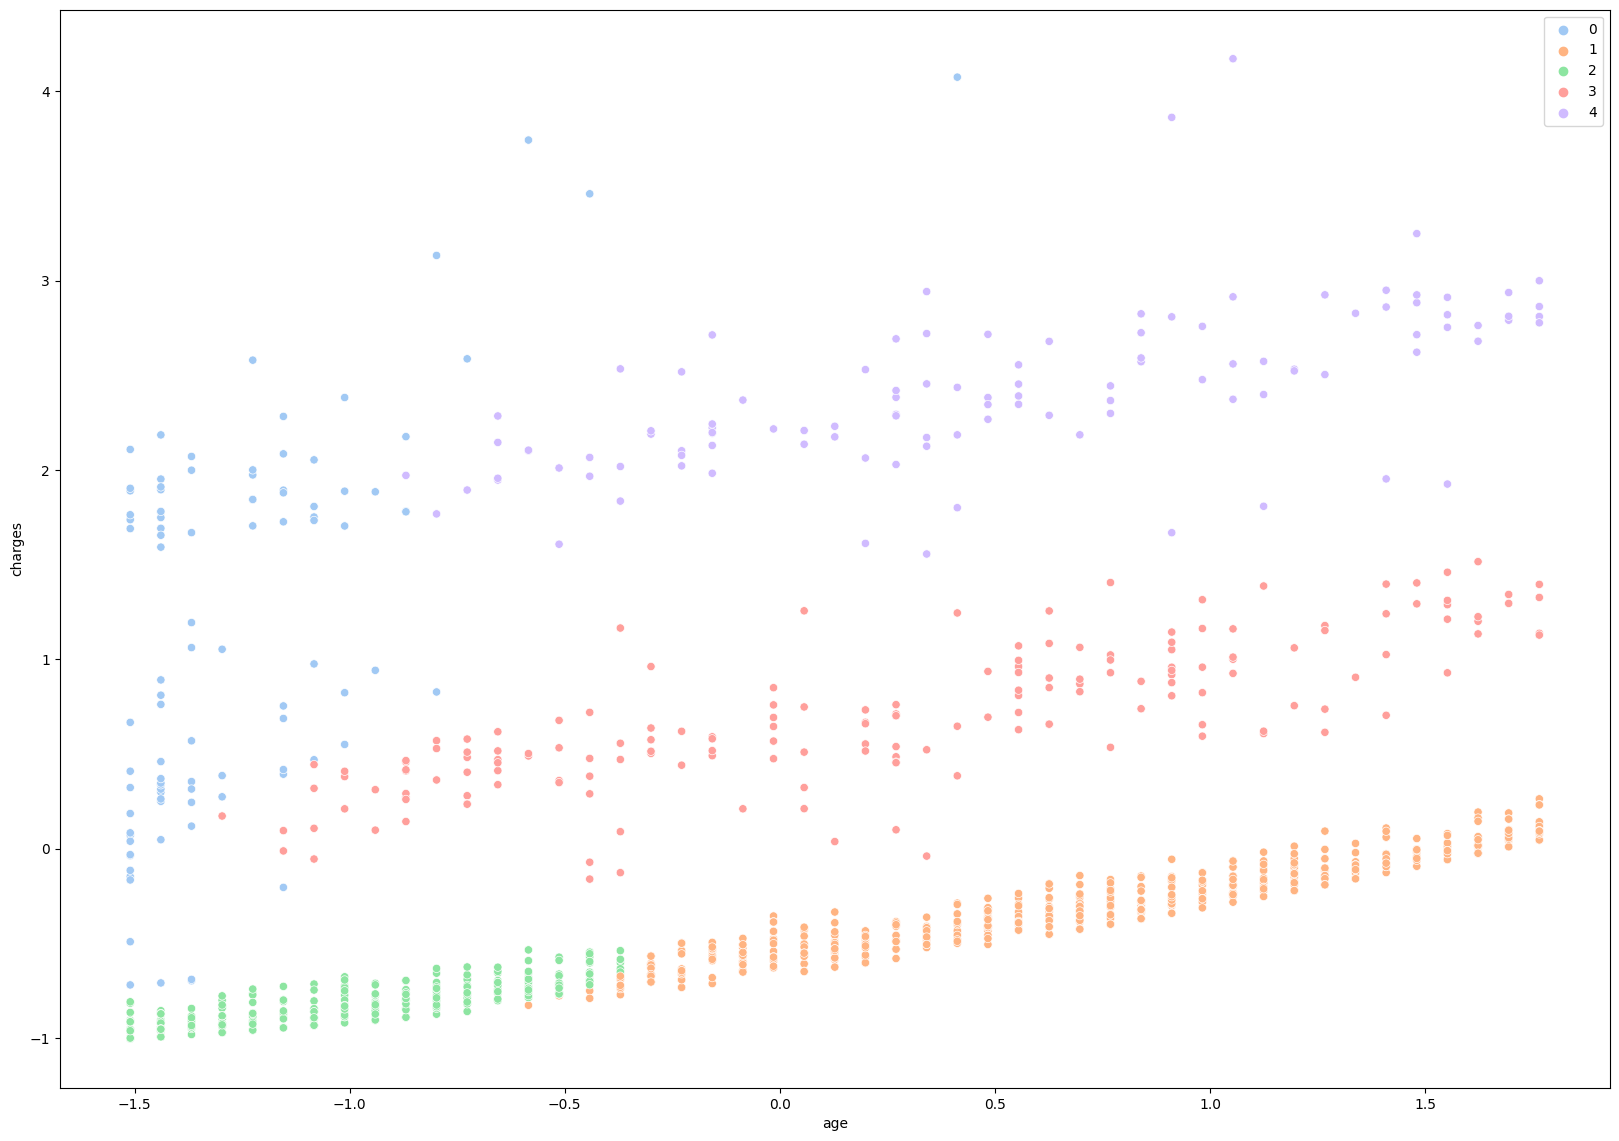

In [11]:
gm =GaussianMixture(n_components=5, covariance_type="full", random_state=11).fit(df_)
labels = gm.predict(df_)
plt.figure(figsize=(20,14))
sns.scatterplot(x = df_['age'],y = df_['charges'], hue=labels,palette="pastel")
plt.show()

Make 5 samples

In [12]:
gm.sample(5)


(array([[-0.80330457, -0.91507134],
        [-1.02190023, -0.84607492],
        [-0.82468418, -0.7570869 ],
        [-0.08678846,  0.32872369],
        [ 1.18213595,  2.52569918]]),
 array([2, 2, 2, 3, 4]))

Find outlier

In [13]:
densities = gm.score_samples(df_)
density_threshold = np.percentile(densities, 2) # 밀도 낮은 지역에 있는 샘플의 2%
anomalies = df_[densities < density_threshold]
print(anomalies, len(anomalies))

           age   charges
34   -0.797954  3.132806
71   -0.584350 -0.534548
140  -0.370746  1.165214
242   1.124479  1.808247
353  -0.441948 -0.071500
378   1.765289  0.263127
387   0.768473  1.405497
543   1.053277  4.171663
577  -0.584350  3.742159
599   0.910875  1.668793
627  -0.441948 -0.160564
641   0.198863  1.612247
746  -0.370746 -0.126602
772   0.341265 -0.039091
806   0.056461  1.256151
819  -0.441948  3.458348
936   0.341265  1.556174
937  -0.014740 -0.355593
984  -1.367563 -0.690213
1012  1.551686  1.925562
1095 -1.509965 -0.719445
1146  1.480485  3.248148
1191  0.127662  0.037590
1206  1.409283  1.952849
1230  0.910875  3.861966
1272  0.270064  0.099782
1300  0.412467  4.074389 27


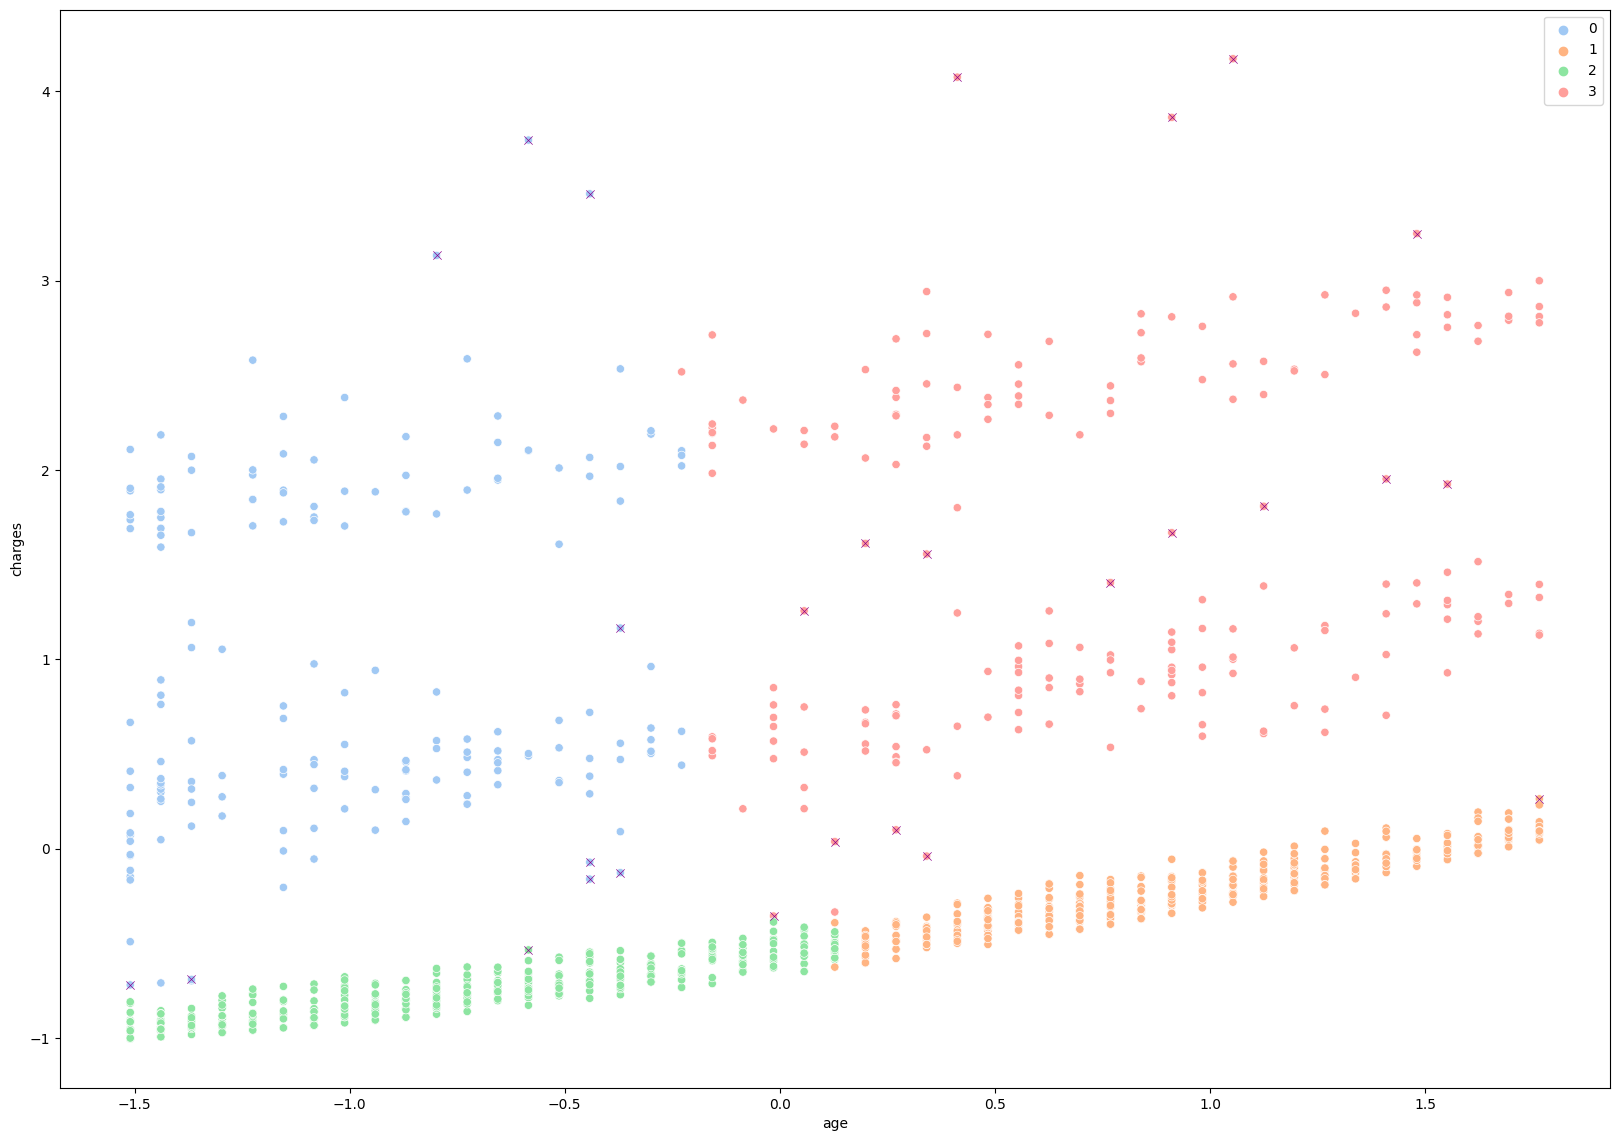

In [14]:
gm =GaussianMixture(n_components=4, covariance_type="full", random_state=11).fit(df_)
labels = gm.predict(df_)
plt.figure(figsize=(20,14))
sns.scatterplot(x = df_['age'],y = df_['charges'], hue=labels,palette="pastel")
sns.scatterplot(data=anomalies, x = anomalies['age'], y= anomalies['charges'], color='darkmagenta', marker='x')
plt.show()